In [22]:
import pandas as pd
import numpy as np
from dfply import *
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [23]:
airports = pd.read_csv('airports.csv')
flight = pd.read_csv('flights.csv')

In [24]:
flight.head

<bound method NDFrame.head of         Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
0                1  2013      1    1     517.0             515        2.0   
1                2  2013      1    1     533.0             529        4.0   
2                3  2013      1    1     542.0             540        2.0   
3                4  2013      1    1     544.0             545       -1.0   
4                5  2013      1    1     554.0             600       -6.0   
...            ...   ...    ...  ...       ...             ...        ...   
336771      336772  2013      9   30       NaN            1455        NaN   
336772      336773  2013      9   30       NaN            2200        NaN   
336773      336774  2013      9   30       NaN            1210        NaN   
336774      336775  2013      9   30       NaN            1159        NaN   
336775      336776  2013      9   30       NaN             840        NaN   

        arr_time  sched_arr_time  arr_delay c

In [25]:
summary = flight.describe()
summary = summary.transpose()
summary.head

<bound method NDFrame.head of                    count           mean           std     min       25%  \
Unnamed: 0      336776.0  168388.500000  97219.001466     1.0  84194.75   
year            336776.0    2013.000000      0.000000  2013.0   2013.00   
month           336776.0       6.548510      3.414457     1.0      4.00   
day             336776.0      15.710787      8.768607     1.0      8.00   
dep_time        328521.0    1349.109947    488.281791     1.0    907.00   
sched_dep_time  336776.0    1344.254840    467.335756   106.0    906.00   
dep_delay       328521.0      12.639070     40.210061   -43.0     -5.00   
arr_time        328063.0    1502.054999    533.264132     1.0   1104.00   
sched_arr_time  336776.0    1536.380220    497.457142     1.0   1124.00   
arr_delay       327346.0       6.895377     44.633292   -86.0    -17.00   
flight          336776.0    1971.923620   1632.471938     1.0    553.00   
air_time        327346.0     150.686460     93.688305    20.0     82.0

In [26]:
# Select
(flight >>
 select(X.origin, X.dest, X.hour) >>
 head()
)

,origin,dest,hour
0,EWR,IAH,5
1,LGA,IAH,5
2,JFK,MIA,5
3,JFK,BQN,5
4,LGA,ATL,6


In [27]:
# Drop
(flight >>
 drop(X.year, X.month, X.day) >>
 head()
)

,Unnamed: 0,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [28]:
# Select
(flight >>
 select(~X.hour, ~X.minute)
)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336772,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,2013-09-30 14:00:00
336772,336773,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,2013-09-30 22:00:00
336773,336774,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,2013-09-30 12:00:00
336774,336775,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,2013-09-30 11:00:00


In [29]:
# Filtering
(flight >> 
     mask(X.month == 1, X.day == 1, X.origin == 'JFK', X.hour > 10) >>
     head())

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,152,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
258,259,2013,1,1,1059.0,1100,-1.0,1210.0,1215,-5.0,MQ,3792,N509MQ,JFK,DCA,50.0,213,11,0,2013-01-01 11:00:00
265,266,2013,1,1,1111.0,1115,-4.0,1222.0,1226,-4.0,B6,24,N279JB,JFK,BTV,52.0,266,11,15,2013-01-01 11:00:00
266,267,2013,1,1,1112.0,1100,12.0,1440.0,1438,2.0,UA,285,N517UA,JFK,SFO,364.0,2586,11,0,2013-01-01 11:00:00
272,273,2013,1,1,1124.0,1100,24.0,1435.0,1431,4.0,B6,641,N590JB,JFK,SFO,349.0,2586,11,0,2013-01-01 11:00:00


In [30]:
# Arrange (ascending)
(flight >>
 arrange(X.distance, X.hour) >>
 head()
)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
275945,275946,2013,7,27,NaN,106,NaN,NaN,245,NaN,US,1632,NaN,EWR,LGA,NaN,17,1,6,2013-07-27 01:00:00
3083,3084,2013,1,4,1240.0,1200,40.0,1333.0,1306,27.0,EV,4193,N14972,EWR,PHL,30.0,80,12,0,2013-01-04 12:00:00
3901,3902,2013,1,5,1155.0,1200,-5.0,1241.0,1306,-25.0,EV,4193,N14902,EWR,PHL,29.0,80,12,0,2013-01-05 12:00:00
3426,3427,2013,1,4,1829.0,1615,134.0,1937.0,1721,136.0,EV,4502,N15983,EWR,PHL,28.0,80,16,15,2013-01-04 16:00:00
10235,10236,2013,1,12,1613.0,1617,-4.0,1708.0,1722,-14.0,EV,4616,N11150,EWR,PHL,36.0,80,16,17,2013-01-12 16:00:00


In [31]:
# Arrange (Decending)
(flight >>
 arrange(X.distance, X.hour, ascending=False) >>
 head()
)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
28259,28260,2013,10,2,951.0,1000,-9.0,1438.0,1450,-12.0,HA,51,N381HA,JFK,HNL,623.0,4983,10,0,2013-10-02 10:00:00
30229,30230,2013,10,4,954.0,1000,-6.0,1438.0,1450,-12.0,HA,51,N380HA,JFK,HNL,618.0,4983,10,0,2013-10-04 10:00:00
31157,31158,2013,10,5,1002.0,1000,2.0,1418.0,1450,-32.0,HA,51,N384HA,JFK,HNL,593.0,4983,10,0,2013-10-05 10:00:00
31850,31851,2013,10,6,958.0,1000,-2.0,1415.0,1450,-35.0,HA,51,N389HA,JFK,HNL,601.0,4983,10,0,2013-10-06 10:00:00
32842,32843,2013,10,7,957.0,1000,-3.0,1504.0,1450,14.0,HA,51,N390HA,JFK,HNL,642.0,4983,10,0,2013-10-07 10:00:00


In [32]:
# Mutate
(flight >>
 mutate(
  new_distance = X.distance / 1000,
  carrier_origin = X.carrier + X.origin) >>
 head())

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,new_distance,carrier_origin
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1.400,UAEWR
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1.416,UALGA
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1.089,AAJFK
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,1.576,B6JFK
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0.762,DLLGA


In [33]:
# Group by
(flight >>
 group_by(X.origin)
)


,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336772,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,336773,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,336774,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,336775,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


In [34]:
# Group by and summarize
(flight >>
 group_by(X.origin) >>
 summarize(mean_distance = X.distance.mean())
)

,origin,mean_distance
0,EWR,1056.742790
1,JFK,1266.249077
2,LGA,779.835671


In [35]:
#Bringing it together with pipes
#[Step 1]: Filter out all flights less than 10 hours
#[Step 2]: Create a new column, speed, using the formula [distance / (air time * 60)]
#[Step 3]: Calculate the mean speed for flights originating from each airport
#[Step 4]: Sort the result by mean speed in descending order
(flight >>
  mask(X.hour > 10) >> # step 1
  mutate(speed = X.distance / (X.air_time * 60)) >> # step 2
  group_by(X.origin) >> # step 3a
  summarize(mean_speed = X.speed.mean()) >> # step 3b
  arrange(X.mean_speed, ascending=False) # step 4
)

,origin,mean_speed
0,EWR,0.109777
1,JFK,0.109427
2,LGA,0.107362


In [36]:
flight.loc[flight['hour'] > 10, 'speed'] = flight['distance'] / (flight['air_time'] * 60)
result = flight.groupby('origin', as_index=False)['speed'].mean()
result.sort_values('speed', ascending=False)

,origin,speed
0,EWR,0.109777
1,JFK,0.109427
2,LGA,0.107362


In [37]:
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [39]:
average = df['Price'].mean()
print(average)

med = df['Price'].median()
print(med)

standard_deviation = df['Price'].std()
print(standard_deviation)

997898.2414882415
830000.0
593498.9190372769


I:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


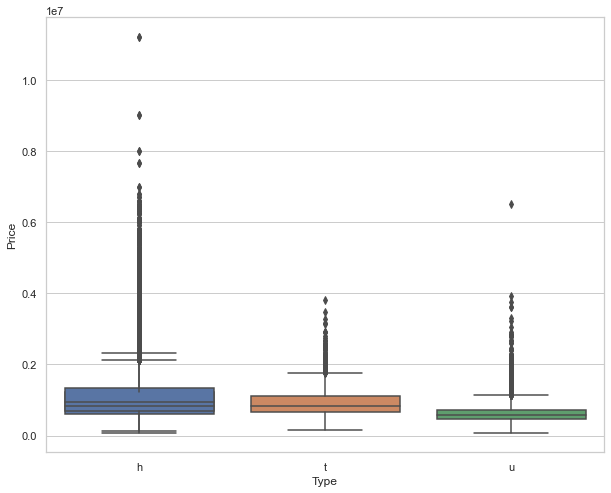

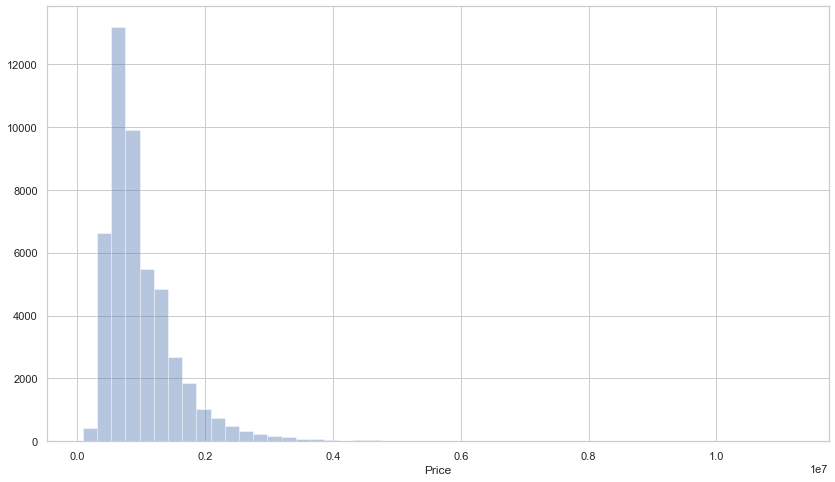

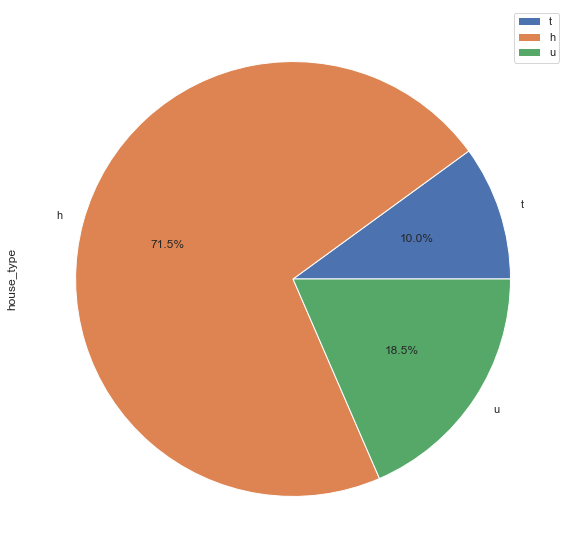

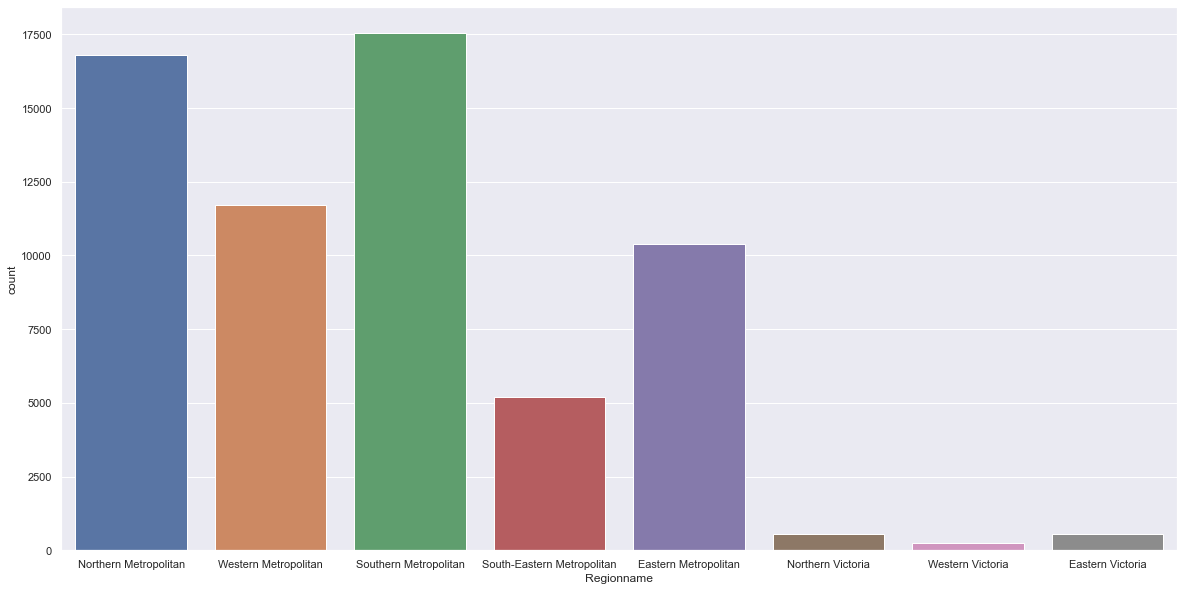

In [40]:
%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(y='Price', data=df, orient="v")

ax = sns.boxplot(x='Type', y='Price', data=df, orient="v")

filter_data = df.dropna(subset=['Price'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['Price'], kde=False)

type_counts = df['Type'].value_counts()
df2 = pd.DataFrame({'house_type': type_counts}, 
                     index = ['t', 'h', 'u']
                   )

df2.plot.pie(y='house_type', figsize=(10,10), autopct='%1.1f%%')

sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Regionname', data=df)

In [41]:
df.corr()
pd.plotting.scatter_matrix(df, figsize=(6,6))
plt.show()

KeyboardInterrupt: 

In [ ]:
# get data
url = "http://peopleanalytics-regression-book.org/data/ugtests.csv"
ugtests = pd.read_csv(url)
sns.scatterplot(data=ugtests, x="Yr1", y="Final")
fig = px.scatter_3d(ugtests, x='Yr3', y='Final', z='Yr1')
fig.show()

In [ ]:
sns.histplot(data=ugtests, x = 'Yr1')

In [ ]:
ugtests.corr()

In [ ]:
plt.matshow(ugtests.corr())
plt.xticks(range(len(ugtests.columns)), ugtests.columns)
plt.yticks(range(len(ugtests.columns)), ugtests.columns)
plt.colorbar()
plt.show()

In [ ]:
# define model
model = smf.ols(formula = "Final ~ Yr3 + Yr2 + Yr1", data = ugtests)
# fit model
ugtests_model = model.fit()
# see results summary
print(ugtests_model.summary())

In [ ]:
sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip",  data=tips);
sns.lmplot(x="total_bill", y='tip', hue='smoker', data = tips);
sns.lmplot(x="total_bill", y='tip', col='sex', row='smoker', data = tips);

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# obtain salespeople data
url = "http://peopleanalytics-regression-book.org/data/salespeople.csv"
salespeople = pd.read_csv(url)

# define model
model = smf.glm(formula = "promoted ~ sales + customer_rate", 
                data = salespeople, 
                family = sm.families.Binomial())


# fit model
promotion_model = model.fit()


# see results summary
print(promotion_model.summary())

In [ ]:
# Using graph_objects
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df

In [ ]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['AAPL.High'])])
fig.show()

In [ ]:
import plotly.express as px
df = px.data.stocks()
fig = px.line(df, x="date", y=df.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()